In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rental-bike-sharing/hour.csv
/kaggle/input/rental-bike-sharing/Readme.txt
/kaggle/input/rental-bike-sharing/day.csv


In [32]:
import numpy as np
import pandas as pd

In [33]:
hour = pd.read_csv("bike_hourdata.csv")

## Importing Libraries

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Loading

In [3]:
hour = pd.read_csv("/kaggle/input/rental-bike-sharing/hour.csv")
day = pd.read_csv("/kaggle/input/rental-bike-sharing/day.csv")

In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
print("Shape of hour data: {}".format(hour.shape))
print("Shape of Day data: {}".format(day.shape))

Shape of hour data: (17379, 17)
Shape of Day data: (731, 16)


In [35]:
hour_features = hour.drop("cnt", axis = 1).columns
hour_features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [36]:
# Data types
hour.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
print(hour["yr"].value_counts())
print(hour["season"].value_counts())

1    8734
0    8645
Name: yr, dtype: int64
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64


### Feature Description
- instant: record index (Irrelevant)
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
- cnt: count of total rental bikes including both casual and registered 
 

In [10]:
from datetime import datetime
from dateutil import parser

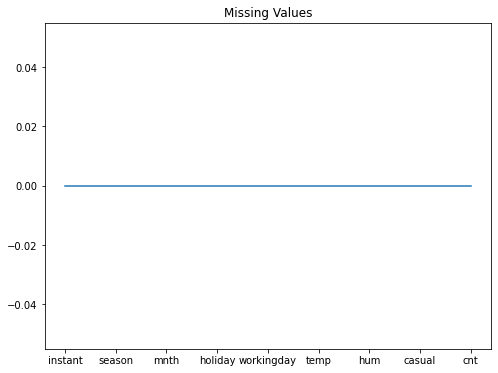

In [11]:
# Missing values
plt.figure(figsize = (8,6))
hour.isna().sum().plot() # NO missing Values
plt.title("Missing Values")
plt.show()

In [37]:
hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Ideas**
1. Divide hour of day into 5 categories 
* Early Morning - 4th hour to 7th hour 
* Morning - 8th hour to 12th hour
* Afternoon - 13th hour to 16th hour
* Evening - 17th hour to 20th hour
* Night - 21st hour to 3rd hour

2. Divide Weekday - Weekday or Weekend
3. Season, Weather Sit - Change it to OHE as the it is not an ordinal data


## Data Transformation

In [13]:
hour["registered"].min(), hour["registered"].max(),

(0, 886)

<AxesSubplot:>

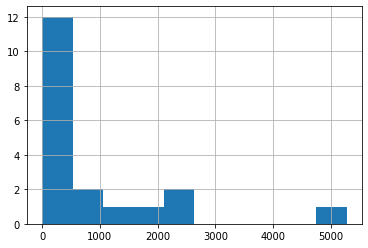

In [14]:
# Let us take a look at the Regsitered count targets distribution
hour.groupby(pd.cut(hour["registered"], bins = range(0,1000,50)))["registered"].count().hist()

The least populated class of registered count has only 1 occurence. SO we cannot use a Stratified Sampling approach.
We will use the simple random sampling to create the test set


In [38]:
# BEfore moving on let us create the Test dataset
hour.shape

from sklearn.model_selection import train_test_split
train_hour, test_hour = train_test_split(hour, test_size = 0.2, random_state = 12)

train_hour.shape, test_hour.shape

((13903, 15), (3476, 15))

In [39]:
# Using Train set for further analysis
train_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8273,4,0,12,9,0,5,1,1,0.36,0.3333,0.46,0.3881,8,235,243
8393,1,0,12,9,0,3,1,2,0.40,0.4091,0.87,0.2239,14,220,234
1351,1,0,3,14,0,2,1,1,0.32,0.3333,0.36,0.1343,18,61,79
12541,2,1,6,18,0,1,1,2,0.80,0.7273,0.43,0.2985,105,726,831
12862,3,1,6,3,0,1,1,1,0.68,0.6364,0.69,0.2537,1,4,5


Early Morning - 4th hour to 7th hour

Morning - 8th hour to 12th hour

Afternoon - 13th hour to 16th hour

Evening - 17th hour to 20th hour

Night - 21st hour to 3rd hour

In [40]:
def hour_transformer(x):
    if x >=4 and x <=7:
        return "Early_Morning"
    elif x>=8 and x<=12:
        return "Morning"
    elif x >= 13 and x <=16:
        return "Afternoon" 
    elif x >=17 and x <=20:
        return "Evening"
    elif x>=21 or x <=3:
        return "Night"


In [41]:
## Transformer
from sklearn.base import BaseEstimator, TransformerMixin


class dataset_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, transform_cols = 1, drop_cols = 1, transform_season = 1, tranform_weathersit = 1, transform_weekday = 1, add_hour_of_day = 1, drop_originals = 0):
        self.transform_cols = transform_cols
        self.drop_cols = drop_cols
        self.transform_season = transform_season
        self.transform_weathersit = tranform_weathersit
        self.transform_weekday = transform_weekday
        self.add_hour_of_day = add_hour_of_day
        self.drop_originals = drop_originals
        return None
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        transformed_df = X.copy()
        if self.transform_cols:
                if self.transform_weathersit:
                    transformed_df["weathersit_tr"] = transformed_df["weathersit"].map({1:'Clear', 2:'Mist', 3:'Light_Snow', 4:'Heavy_Rain'})
                if self.transform_weekday:
                    transformed_df["weekday_tr"] =  transformed_df["weekday"].transform(lambda x: 0 if (x == 0 or x == 6) else 1)
                if self.add_hour_of_day:
                    transformed_df["hour_of_day_tr"] = transformed_df["hr"].transform(lambda x: hour_transformer(x))
                if self.drop_originals:
                    transformed_df.drop(["season", "weathersit", "weekday", "hr"], axis = 1, inplace = True)
        return transformed_df

    
        

In [42]:
col_trans = dataset_transformer(drop_originals = 1)
train_hour_tr = col_trans.transform(train_hour)
train_hour_tr.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_tr,weekday_tr,hour_of_day_tr
8273,0,12,0,1,0.36,0.3333,0.46,0.3881,8,235,243,Clear,1,Morning
8393,0,12,0,1,0.40,0.4091,0.87,0.2239,14,220,234,Mist,1,Morning
1351,0,3,0,1,0.32,0.3333,0.36,0.1343,18,61,79,Clear,1,Afternoon
12541,1,6,0,1,0.80,0.7273,0.43,0.2985,105,726,831,Mist,1,Evening
12862,1,6,0,1,0.68,0.6364,0.69,0.2537,1,4,5,Clear,1,Night


## EDA

In [87]:
# Looking at the summary stats
train_hour_tr.describe()
print("The average registered count of the training dataset %.0f" %(train_hour_tr["registered"].mean()))
print("The average registered count of the Testing dataset %.0f" %(test_hour_tr["registered"].mean()))

The average registered count of the training dataset 153
The average registered count of the Testing dataset 156


In [20]:
# Check if the holiday represents the weekdays and weekends 
pd.crosstab(train_hour_tr["holiday"],train_hour_tr["weekday_tr"])

weekday_tr,0,1
holiday,,
0,4027,9464
1,0,412


The weekends do not count as holidays. However, there are 412 weekday holidays in the 2 years

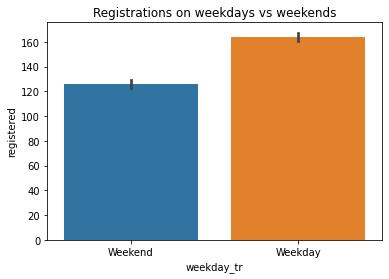

In [21]:
# Registered count in weekdays and weekends
plt.title("Registrations on weekdays vs weekends")
ax = sns.barplot(x = "weekday_tr", y = "registered", data = train_hour_tr)
ax.set_xticklabels({'Weekend':0, 'Weekday':1}.keys())
plt.show()

There are more registrations on the weekdays than on the weekends. One reason could be is may be people rely on bikes for daily workplace commute.

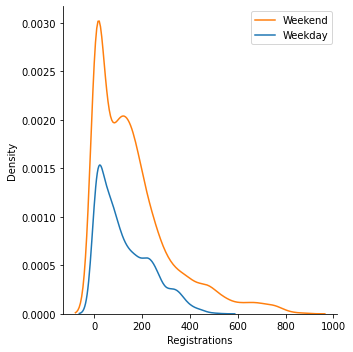

In [22]:
# We will use MannWhitneyU test to see if the registrations change with the weekday or weekend
# Even though MannWhitneyU test does not expect the dependent variable to be normally distributed, let us still go ahead and check if it is normally distributed.
sns.displot(data = train_hour_tr, x = "registered", hue = "weekday_tr", kind = 'kde', legend = False)
plt.xlabel("Registrations")
plt.legend({"Weekend":0, "Weekday":1}.keys())
plt.show()

In [23]:
# CHecking for Skewness of values
from scipy.stats import skewtest, skew
for i in train_hour_tr[["temp", "atemp", "registered", "casual"]].columns:
    print(i,':', skewtest(train_hour_tr[i]).pvalue, ['Skewed' if skewtest(train_hour_tr[i]).pvalue <= 0.05 else 'Normal'])
print("**********************************************")
for i in train_hour_tr[["temp", "atemp", "registered", "casual"]].columns:
    print(i,':', skew(train_hour_tr[i]))
    
# H0 - This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.

temp : 0.6706915425920954 ['Normal']
atemp : 0.00022011874108668952 ['Skewed']
registered : 0.0 ['Skewed']
casual : 0.0 ['Skewed']
**********************************************
temp : 0.008828526626182949
atemp : -0.07682598398053479
registered : 1.5527844974336837
casual : 2.538369552597277


**The registered count is not normally distributed, as confirmed by skewtest**

Data is not normally distributed. So, let us transform the data.

In [24]:
hour_df = train_hour_tr[["registered"]].copy()
hour_df["registered_norm"] = np.sqrt(hour_df["registered"])
hour_df

,registered,registered_norm
8273,235,15.329710
8393,220,14.832397
1351,61,7.810250
12541,726,26.944387
12862,4,2.000000
...,...,...
9475,54,7.348469
3714,199,14.106736
7409,418,20.445048
5787,176,13.266499


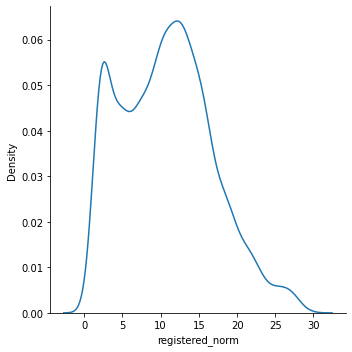

In [25]:
sns.displot(data = hour_df, x = "registered_norm", kind = "kde")
plt.show()

In [26]:
train_hour_tr["registered_norm"] = hour_df["registered_norm"].copy()
train_hour_tr

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_tr,weathersit_tr,weekday_tr,hour_of_day_tr,registered_norm
8273,2011-12-16,0,12,0,1,0.36,0.3333,0.46,0.3881,8,235,243,fall,Clear,1,Morning,15.329710
8393,2011-12-21,0,12,0,1,0.40,0.4091,0.87,0.2239,14,220,234,winter,Mist,1,Morning,14.832397
1351,2011-03-01,0,3,0,1,0.32,0.3333,0.36,0.1343,18,61,79,winter,Clear,1,Afternoon,7.810250
12541,2012-06-11,1,6,0,1,0.80,0.7273,0.43,0.2985,105,726,831,summer,Mist,1,Evening,26.944387
12862,2012-06-25,1,6,0,1,0.68,0.6364,0.69,0.2537,1,4,5,spring,Clear,1,Night,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,2012-02-04,1,2,0,0,0.30,0.2879,0.70,0.1940,13,54,67,winter,Light_Snow,0,Evening,7.348469
3714,2011-06-08,0,6,0,1,0.92,0.8788,0.40,0.2239,34,199,233,summer,Clear,1,Afternoon,14.106736
7409,2011-11-10,0,11,0,1,0.40,0.4091,0.94,0.0896,18,418,436,fall,Mist,1,Morning,20.445048
5787,2011-09-03,0,9,0,0,0.72,0.6818,0.66,0.1642,204,176,380,spring,Mist,0,Afternoon,13.266499


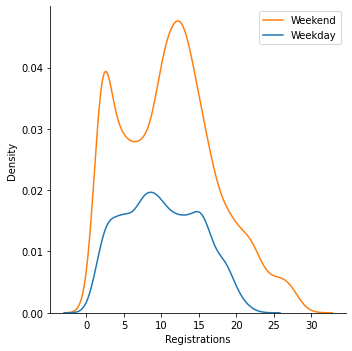

In [27]:
sns.displot(data = train_hour_tr, x = "registered_norm", hue = "weekday_tr", kind = 'kde', legend = False)
plt.xlabel("Registrations")
plt.legend({"Weekend":0, "Weekday":1}.keys())
plt.show()

***Even though the dependent variable is not normally distributued, the Mann-whitneyU test does not require the target to be normally ditributed.***

### Testing for hypothesis, does the registered counts change with weekdays

In [28]:
from scipy.stats import mannwhitneyu
_, pval = mannwhitneyu(train_hour_tr[train_hour_tr.weekday_tr == 0]["registered"], train_hour_tr[train_hour_tr.weekday_tr == 1]["registered"])
print("p-value of test is %.4f. Hence, the null hypo is %s." %(pval, 'rejected' if pval <=0.05 else 'not rejected'))
#The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions.

p-value of test is 0.0000. Hence, the null hypo is rejected.


Hence, there is indeed a difference in the registered counts between weekdays and weekends

In [29]:
train_hour_tr.head()

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_tr,weathersit_tr,weekday_tr,hour_of_day_tr,registered_norm
8273,2011-12-16,0,12,0,1,0.36,0.3333,0.46,0.3881,8,235,243,fall,Clear,1,Morning,15.329710
8393,2011-12-21,0,12,0,1,0.40,0.4091,0.87,0.2239,14,220,234,winter,Mist,1,Morning,14.832397
1351,2011-03-01,0,3,0,1,0.32,0.3333,0.36,0.1343,18,61,79,winter,Clear,1,Afternoon,7.810250
12541,2012-06-11,1,6,0,1,0.80,0.7273,0.43,0.2985,105,726,831,summer,Mist,1,Evening,26.944387
12862,2012-06-25,1,6,0,1,0.68,0.6364,0.69,0.2537,1,4,5,spring,Clear,1,Night,2.000000


#### Holidays vs Registrations

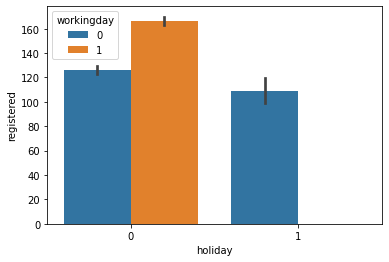

In [30]:
sns.barplot(data = train_hour_tr, x = "holiday", y = 'registered', hue = 'workingday')
plt.show()

In [31]:
train_hour_tr.groupby(['holiday', 'workingday',"weekday_tr"])["registered"].count()

holiday  workingday  weekday_tr
0        0           0             4027
         1           1             9464
1        0           1              412
Name: registered, dtype: int64

The non-holiday days have more bookings. This also provides some evidence that the people mostly rely on the bikes for daily commute to workplace. The Weekday/Weekend relationship with the registrations also signified so.

### Registrations by Hour of Day

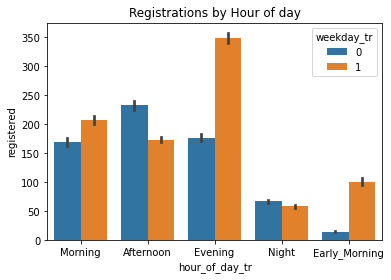

In [32]:
sns.barplot(data = train_hour_tr, x = 'hour_of_day_tr', y = 'registered', hue = 'weekday_tr')
plt.title("Registrations by Hour of day")
plt.show()

* There are more registrations in the evening than anytime in the day. 

* Night bookings are fewer than the other times in weekdays. However, in weekends, early morning registrations are fewer.

* Weekday Evenings are booked more often than the mornings. May be people commute to home/nearby areas (from workplace) during the evenings. 

* Weekend afternoons also see more registrations than any other time in the weekends.

### Registrations by temperature

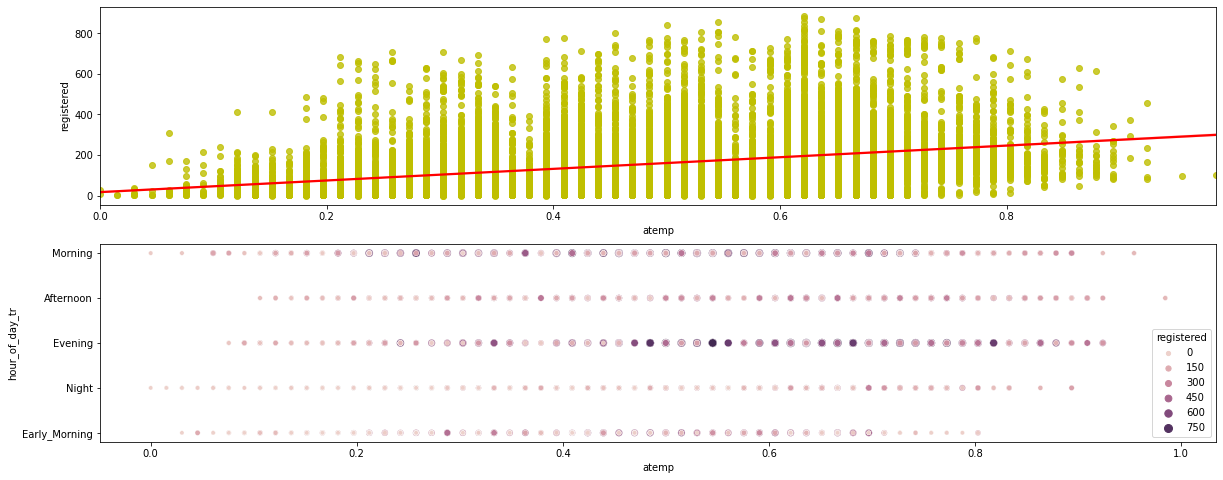

In [33]:
plt.figure(figsize  = (20,8))
ax1 = plt.subplot(211)
sns.regplot(data = train_hour_tr, x = train_hour_tr['atemp'], y = 'registered', marker = 'o', scatter_kws={'color':'y'},line_kws={'color':'r'})
ax2 = plt.subplot(212)
sns.scatterplot(data = train_hour_tr, x = train_hour_tr['atemp'], y = 'hour_of_day_tr', hue = train_hour_tr['registered'], size = train_hour_tr['registered'])
# plt.title("Registration by feeling temperature")
plt.show()

We will confirm this relation by checking the correlation coefficient for continuous variables

The regplot shows that the registrations will increase as the temperature increases.

In [34]:
train_hour_tr.head()

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_tr,weathersit_tr,weekday_tr,hour_of_day_tr,registered_norm
8273,2011-12-16,0,12,0,1,0.36,0.3333,0.46,0.3881,8,235,243,fall,Clear,1,Morning,15.329710
8393,2011-12-21,0,12,0,1,0.40,0.4091,0.87,0.2239,14,220,234,winter,Mist,1,Morning,14.832397
1351,2011-03-01,0,3,0,1,0.32,0.3333,0.36,0.1343,18,61,79,winter,Clear,1,Afternoon,7.810250
12541,2012-06-11,1,6,0,1,0.80,0.7273,0.43,0.2985,105,726,831,summer,Mist,1,Evening,26.944387
12862,2012-06-25,1,6,0,1,0.68,0.6364,0.69,0.2537,1,4,5,spring,Clear,1,Night,2.000000


### Registrations by weather

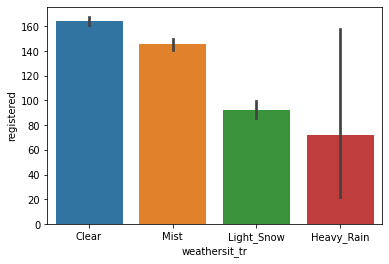

In [35]:
sns.barplot(data = train_hour_tr, x = 'weathersit_tr', y  = 'registered')
plt.show()

In [36]:
train_hour_tr[["weathersit_tr",'registered']].groupby(["weathersit_tr"]).agg(['min',"max","mean"])

registered                 
                     min  max        mean
weathersit_tr                            
Clear                  0  886  164.098229
Heavy_Rain            22  158   71.666667
Light_Snow             0  734   92.492091
Mist                   0  822  145.327976

The resgitrations are more when the weather is clear or there is misty. However, it is highly unpredictable when it rains though.

In [43]:
# Encoding categorical values
train_hour_tr_encoded = pd.get_dummies(train_hour_tr)
train_hour_tr_encoded.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_tr,weathersit_tr_Clear,weathersit_tr_Heavy_Rain,weathersit_tr_Light_Snow,weathersit_tr_Mist,hour_of_day_tr_Afternoon,hour_of_day_tr_Early_Morning,hour_of_day_tr_Evening,hour_of_day_tr_Morning,hour_of_day_tr_Night
8273,0,12,0,1,0.36,0.3333,0.46,0.3881,8,235,...,1,1,0,0,0,0,0,0,1,0
8393,0,12,0,1,0.40,0.4091,0.87,0.2239,14,220,...,1,0,0,0,1,0,0,0,1,0
1351,0,3,0,1,0.32,0.3333,0.36,0.1343,18,61,...,1,1,0,0,0,1,0,0,0,0
12541,1,6,0,1,0.80,0.7273,0.43,0.2985,105,726,...,1,0,0,0,1,0,0,1,0,0
12862,1,6,0,1,0.68,0.6364,0.69,0.2537,1,4,...,1,1,0,0,0,0,0,0,0,1


In [44]:
train_hour_tr_encoded.columns.to_list()

['yr',
 'mnth',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'weekday_tr',
 'weathersit_tr_Clear',
 'weathersit_tr_Heavy_Rain',
 'weathersit_tr_Light_Snow',
 'weathersit_tr_Mist',
 'hour_of_day_tr_Afternoon',
 'hour_of_day_tr_Early_Morning',
 'hour_of_day_tr_Evening',
 'hour_of_day_tr_Morning',
 'hour_of_day_tr_Night']

In [45]:
cat_cols = ["holiday","workingday",'weekday_tr',
 'season_tr_spring',
 'season_tr_summer',
 'season_tr_winter',
 'weathersit_tr_Heavy_Rain',
 'weathersit_tr_Light_Snow',
 'weathersit_tr_Mist',
 'hour_of_day_tr_Early_Morning',
 'hour_of_day_tr_Evening',
 'hour_of_day_tr_Morning',
 'hour_of_day_tr_Night']


In [40]:
# Checking the MannWhitneyU test p-values for each categorical column
for i in cat_cols:
    _,pval = mannwhitneyu(train_hour_tr_encoded[train_hour_tr_encoded[i] == 0]["registered"], train_hour_tr_encoded[train_hour_tr_encoded[i] == 1]["registered"])
    print("p-value for field :%s is %.3f, null hyp %s" %(i, pval, 'rejected' if pval<=0.05 else 'not rejected'))

p-value for field :holiday is 0.000, null hyp rejected
p-value for field :workingday is 0.000, null hyp rejected
p-value for field :weekday_tr is 0.000, null hyp rejected
p-value for field :season_tr_spring is 0.000, null hyp rejected
p-value for field :season_tr_summer is 0.000, null hyp rejected
p-value for field :season_tr_winter is 0.000, null hyp rejected
p-value for field :weathersit_tr_Heavy_Rain is 0.192, null hyp not rejected
p-value for field :weathersit_tr_Light_Snow is 0.000, null hyp rejected
p-value for field :weathersit_tr_Mist is 0.004, null hyp rejected
p-value for field :hour_of_day_tr_Early_Morning is 0.000, null hyp rejected
p-value for field :hour_of_day_tr_Evening is 0.000, null hyp rejected
p-value for field :hour_of_day_tr_Morning is 0.000, null hyp rejected
p-value for field :hour_of_day_tr_Night is 0.000, null hyp rejected


The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples.

Except for HEavy rain, looks like all other categorical value seem to have an impact n the registerations

In [46]:
train_hour_tr_encoded = train_hour_tr_encoded.drop(['yr', 'mnth'], axis = 1)
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'registered']

In [47]:
train_hour_tr_num = train_hour_tr_encoded[num_cols].copy()
train_hour_tr_num

,temp,atemp,hum,windspeed,registered
8273,0.36,0.3333,0.46,0.3881,235
8393,0.40,0.4091,0.87,0.2239,220
1351,0.32,0.3333,0.36,0.1343,61
12541,0.80,0.7273,0.43,0.2985,726
12862,0.68,0.6364,0.69,0.2537,4
...,...,...,...,...,...
9475,0.30,0.2879,0.70,0.1940,54
3714,0.92,0.8788,0.40,0.2239,199
7409,0.40,0.4091,0.94,0.0896,418
5787,0.72,0.6818,0.66,0.1642,176


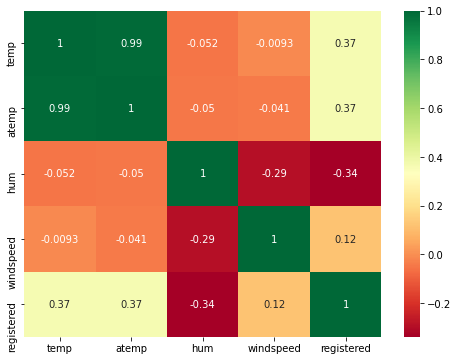

In [89]:
# Corelations matrix for data
plt.figure(figsize = (8,6))
sns.heatmap(train_hour_tr_encoded[num_cols].corr(method = 'spearman'), annot = True, cmap = 'RdYlGn') # Spearmann since,the target variable is not normally distributed
plt.show()

Only 2 of the columns, i.e atemp and humidity are moderately correlated with registrations. 

### Feature Selection

In [48]:
from statsmodels.api import OLS
model = OLS(train_hour_tr_encoded["registered"], train_hour_tr_encoded.drop(["registered", 'cnt', 'casual'],axis =1))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     796.9
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:52:09   Log-Likelihood:                -85548.
No. Observations:               13903   AIC:                         1.711e+05
Df Residuals:                   13889   BIC:                         1.712e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
holiday         

In [45]:
col_list  = ['temp', 'hum']

model = OLS(train_hour_tr_encoded["registered"], train_hour_tr_encoded.drop(["registered", 'cnt', 'casual', 'registered_norm'],axis =1)[col_list])
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:             registered   R-squared (uncentered):                   0.567
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              9108.
Date:                Sun, 12 Sep 2021   Prob (F-statistic):                        0.00
Time:                        18:17:07   Log-Likelihood:                         -88554.
No. Observations:               13903   AIC:                                  1.771e+05
Df Residuals:                   13901   BIC:                                  1.771e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Using ExtraTreeRegressor to check feature importances    

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state = 23)

train_hour_tr_encoded.head()

X = train_hour_tr_encoded.drop(["casual", "registered", "cnt"], axis = 1)
y = train_hour_tr_encoded["cnt"]

In [21]:
y.head()

8273     243
8393     234
1351      79
12541    831
12862      5
Name: cnt, dtype: int64

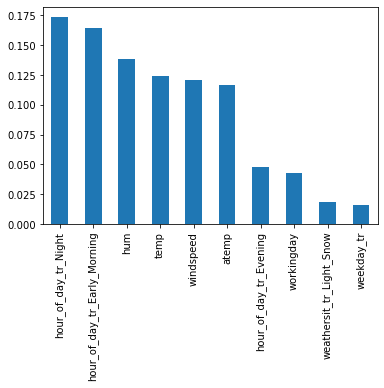

In [50]:
etr.fit(X,y)
feat_imp = pd.Series(etr.feature_importances_, index= list(X.columns))
feat_imp.nlargest(10).plot(kind ='bar')
plt.show()

In [91]:
feat_imp.nlargest(10)

hour_of_day_tr_Evening          0.191838
temp                            0.170333
hum                             0.149767
windspeed                       0.130420
hour_of_day_tr_Night            0.081597
workingday                      0.073367
hour_of_day_tr_Early_Morning    0.072077
season_tr_winter                0.052403
weathersit_tr_Light_Snow        0.019985
weathersit_tr_Mist              0.018072
dtype: float64

### Feature Selection using permutation importances

In [15]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'eli5'

In [16]:
!pip install eli5

     -------------------------------------- 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6814477baf8e15340c39eff14767d2419f72ad0b4193a53dc251283949cbf222
  Stored in directory: c:\users\kapil\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\jinja2-2.11.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [49]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
model = RandomForestRegressor(random_state  = 23).fit(X_train, y_train)
perm = PermutationImportance(model, random_state = 23).fit(X_val,y_val)

eli5.show_weights(perm,feature_names = X_val.columns.to_list())

Weight,Feature
0.3529 ± 0.0422,hour_of_day_tr_Evening
0.2573 ± 0.0190,hour_of_day_tr_Night
0.2467 ± 0.0168,temp
0.1577 ± 0.0213,workingday
0.1573 ± 0.0190,hour_of_day_tr_Early_Morning
0.1376 ± 0.0110,hum
0.0934 ± 0.0173,season_tr_winter
0.0319 ± 0.0115,season_tr_summer
0.0285 ± 0.0044,weathersit_tr_Light_Snow
0.0260 ± 0.0089,windspeed


In [50]:
features = ["hour_of_day_tr_Evening", "temp", "hour_of_day_tr_Night","hour_of_day_tr_Early_Morning", "hum", "workingday", "windspeed"]

In [51]:
X_sel = .drop('cnt')

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [51]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([  86.26718963,    4.50545171,  -20.41569111,   12.88172024,
          68.22519257,  212.92995259,  -83.98024391,   -1.1121248 ,
          -7.53397087,   25.53454931,  -12.73685623,  -30.3000646 ,
          17.50237152,   34.61509689,  -96.60090099,  138.99486175,
          40.8193282 , -117.82838585]),
 24.771699077877173)

In [52]:
y_train_pred = lr.predict(X_train)
from sklearn.metrics import mean_squared_error
err = np.sqrt(mean_squared_error(y_train_pred, y_train))
print("Training error : %.3f" %(err))

Training error : 122.595


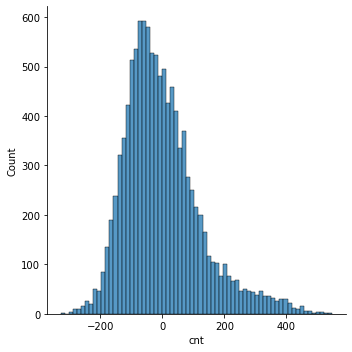

In [25]:
sns.displot((y_train - y_train_pred))
plt.show()

The errors or residuals are normally distributed

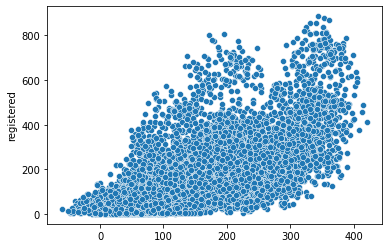

In [56]:
sns.scatterplot(x = y_train_pred, y =  y_train)
plt.show()

In [57]:
# lets us check the error in Validation set
y_val_pred_lr = lr.predict(X_val)
err = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
print("Validation error : %.3f" %(err))

Validation error : 113.472


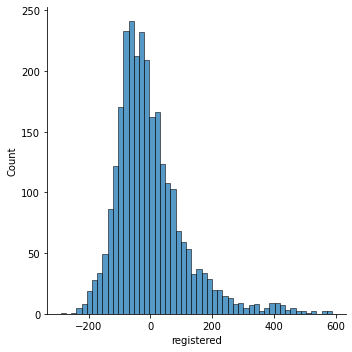

In [58]:
sns.displot((y_val - y_val_pred_lr))
plt.show()

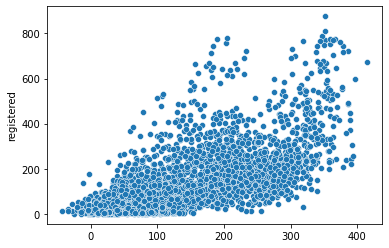

In [59]:
sns.scatterplot(x = y_val_pred_lr, y =  y_val)
plt.show()

The Linear regression scores does not vary much between training and validation set. Lets explore other models 

In [60]:
## Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=4, min_samples_split=3, n_estimators=10)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
err = np.sqrt(mean_squared_error(y_train_pred_rf, y_train))
print("Training error : %.3f" %(err))

Training error : 119.546


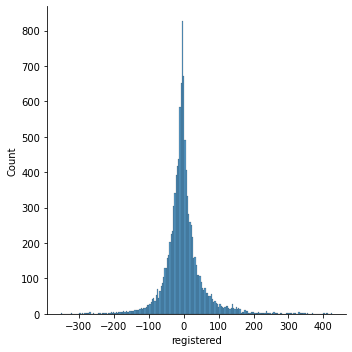

In [61]:
sns.displot(y_train - y_train_pred_rf)
plt.show()

In [55]:
y_val_pred_rf = rf.predict(X_val)
err = np.sqrt(mean_squared_error(y_val_pred_rf, y_val))
print("Validation error : %.3f" %(err))

Validation error : 99.337


The Random forest is overfitting the data. However, the validation score is still better than the Linear Regression

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
# Tuning Random Forest
rf.get_params()

param_grid = [{"max_depth": range(5),
               "min_samples_split": range(0,5),
               "n_estimators": range(10,20,50),
              "bootstrap": [True, False]}]

rSearch = RandomizedSearchCV(rf, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs =-1, verbose = 2)
rSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\job

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': range(0, 5),
                                         'min_samples_split': range(0, 5),
                                         'n_estimators': range(10, 20, 50)}],
                   scoring='neg_mean_squared_error', verbose=2)

In [58]:
for param,result in zip(rSearch.cv_results_["params"], rSearch.cv_results_["mean_test_score"]):
    print(param, np.sqrt(-result))

{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 3, 'bootstrap': True} 129.29091107889096
{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 0, 'bootstrap': True} nan
{'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 2, 'bootstrap': False} 148.2921455367607
{'n_estimators': 10, 'min_samples_split': 1, 'max_depth': 2, 'bootstrap': True} nan
{'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 1, 'bootstrap': False} 165.5695125280699
{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 4, 'bootstrap': False} 125.11998893707924
{'n_estimators': 10, 'min_samples_split': 0, 'max_depth': 1, 'bootstrap': True} nan
{'n_estimators': 10, 'min_samples_split': 1, 'max_depth': 0, 'bootstrap': False} nan
{'n_estimators': 10, 'min_samples_split': 3, 'max_depth': 4, 'bootstrap': True} 119.82277942164772
{'n_estimators': 10, 'min_samples_split': 3, 'max_depth': 4, 'bootstrap': False} 125.11998893707924


In [59]:
rSearch.best_estimator_, np.sqrt(-rSearch.best_score_)

(RandomForestRegressor(max_depth=4, min_samples_split=3, n_estimators=10),
 119.82277942164772)

In [61]:
final_model = rSearch.best_estimator_
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
tr_err = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training Error after tuning :  %.3f" %(tr_err))

Training Error after tuning :  117.462


In [62]:
y_val_pred_rf = final_model.predict(X_val)
val_err = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
print("Validation Error after tuning:  %.3f" %(val_err))

Validation Error after tuning:  118.791


In [69]:
# Performance on Test 
test_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16265,16266,2012-11-15,4,1,11,11,0,4,1,2,0.34,0.3333,0.61,0.1343,28,138,166
10164,10165,2012-03-04,1,1,3,14,0,0,0,1,0.36,0.3333,0.34,0.3582,106,226,332
7894,7895,2011-11-30,4,0,11,14,0,3,1,2,0.38,0.3939,0.43,0.3582,13,99,112
2299,2300,2011-04-10,2,0,4,16,0,0,0,2,0.52,0.5000,0.72,0.1642,135,153,288
13553,13554,2012-07-23,3,1,7,22,0,1,1,1,0.74,0.6818,0.62,0.1940,40,169,209


#### Tranformation of test dataset

In [70]:
test_hour_tr = col_trans.transform(test_hour)
test_hour_tr_encoded = pd.get_dummies(test_hour_tr.drop('dteday', axis = 1), drop_first= True)
test_hour_fin = test_hour_tr_encoded.drop(["casual", "registered", "cnt","atemp"], axis = 1)
y_test = test_hour_tr_encoded["registered"]

In [71]:
X_test = test_hour_fin[features]
X_test.head()

,hour_of_day_tr_Evening,temp,hour_of_day_tr_Night,hour_of_day_tr_Early_Morning,hum,workingday,windspeed
16265,0,0.34,0,0,0.61,1,0.1343
10164,0,0.36,0,0,0.34,0,0.3582
7894,0,0.38,0,0,0.43,1,0.3582
2299,0,0.52,0,0,0.72,0,0.1642
13553,0,0.74,1,0,0.62,1,0.1940


In [63]:
y_test_pred = final_model.predict(X_test)

test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Testing error: %.3f" %(test_err))

NameError: name 'X_test' is not defined

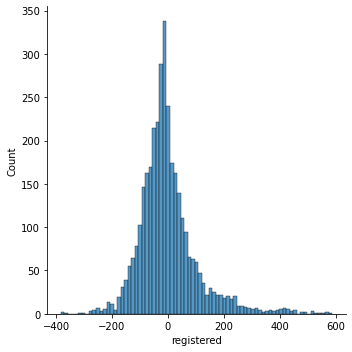

In [73]:
sns.displot( y_test - y_test_pred)
plt.show()

In [74]:
# Standard error of mean
from scipy import stats
conf = 0.95 
sq_errs = (y_test  - y_test_pred) ** 2
dof = len(sq_errs)-1
mean_of_sq_errors = sq_errs.mean()
standard_error_of_mean = stats.sem(sq_errs) # Standard_Dev/sq.root of sample size

#The confidence Interval of the error
np.sqrt(stats.t.interval(conf, dof, loc = mean_of_sq_errors, scale = standard_error_of_mean))

array([100.38144052, 109.29565728])

### Summary

After the feature selection, the below variables were found out to be important that the others

* hour_of_day_tr_Evening
* temp
* hour_of_day_tr_Night
* hour_of_day_tr_Early_Morning
* hum
* workingday
* windspeed

Though the Linear Regressor was stable between the train and test samples, a Random Forest Regressor predict with least error. The score further improved after the hyperparamter tuning using Randomised Search CV and the best estimator was used to check the score/performance of the test data. 

However, the prediction errors can be in the range of 100 to 109.

Next Steps - A more confident result could be obained if GridSearchCV were tried instead of RandomizedSearchCV in the hyperparamter tuning and if other models could be explored.
Similar model should be created for "Casual" counts and then the "Registered" and the "Casual" can be summed up to determine the "Cnt" i.e. the total count.


In [66]:
pickle.dump(pipe,open('model1.pkl','wb'))

NameError: name 'pipe' is not defined

In [65]:
import pickle

In [67]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)